# Planar assumputions
How close do we have to be for significant non-planar effects to influencethe signal at our antenna?

In [1]:
# Import some standard python analysis and plotting packages
import numpy as np
import math as m
import scipy.constants
import matplotlib.pyplot as plt
import matplotlib
import math
matplotlib.rcParams['figure.dpi']=300 # highres display

from matplotlib import rc
rc('font',**{'family':'serif','serif':['Avenir']})

In [55]:
xIn=np.linspace(0,3,1000)  #1000 points along x
yIn=np.linspace(0,1,1000)  #1000 points along y

X,Y = np.meshgrid(xIn,yIn)   #Create a 2D grid of x vs y for making colour plots
diff = np.sqrt(X**2 + Y**2) - X
ratio= X / np.sqrt(X**2 + Y**2)

/var/folders/tt/td83hb5118g0l77wvd_87jfr0000gn/T/ipykernel_45598/3026928051.py:6: RuntimeWarning: invalid value encountered in true_divide
  ratio= X / np.sqrt(X**2 + Y**2)


## Geometry
The most extreme difference in phase in our simple model is between the middle and edge of the antenna (assuming the signal starts at $x=0, y=0$ and propagates spherically out from there (and ignoring the width of the antenna, which is small compared to its length).

In this model we have a simple triangle and the difference in path length between the top of the antenna $(x,y)$ and the centre of the antenna $(x,0)$ is just:
$$ d = \sqrt{x^2 + y^2} -x$$
For scaling we can work in units of wavelength. Then we can plot the difference in path length from the top to the middle of the antenna.

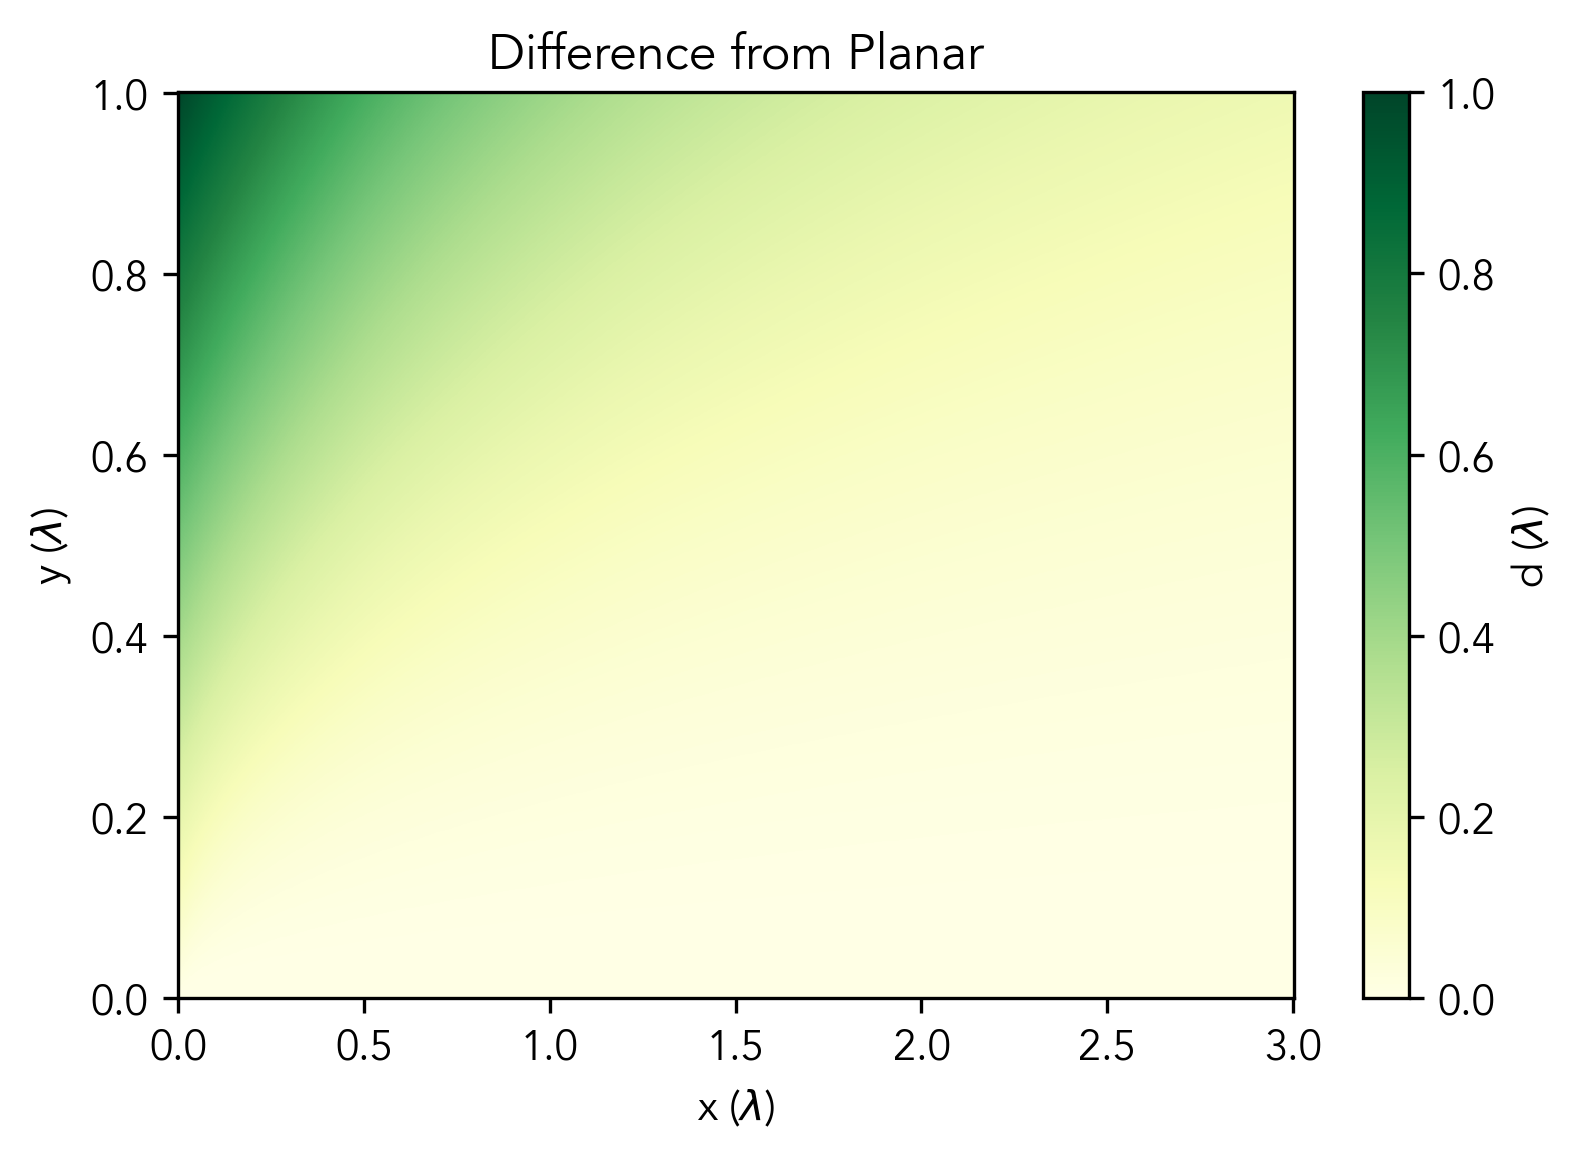

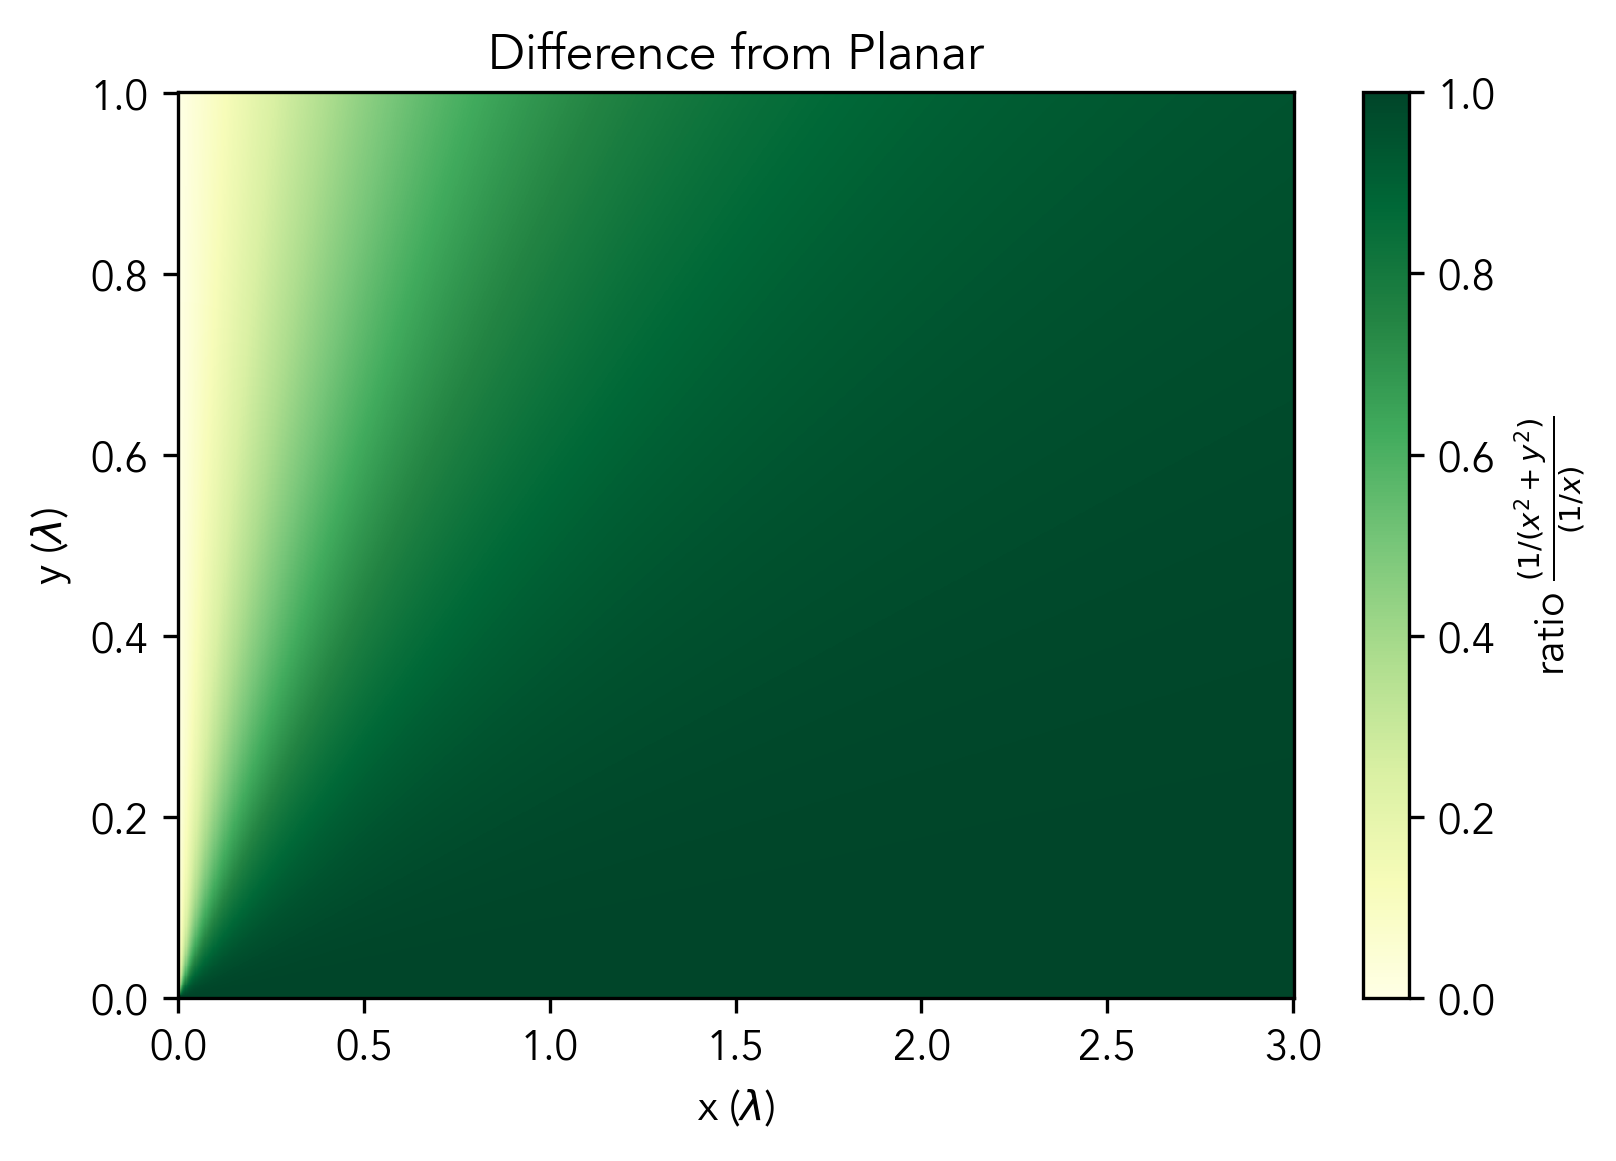

In [58]:
fig, ax = plt.subplots()
cmap=ax.pcolormesh(X, Y,diff,cmap='YlGn')
cbar=fig.colorbar(cmap)
ax.set_title("Difference from Planar")
ax.set_xlabel(r"x ($\lambda$)")
ax.set_ylabel(r"y ($\lambda$)")
cbar.set_label("d ($\lambda$)")

fig, ax = plt.subplots()
cmap=ax.pcolormesh(X, Y,ratio,cmap='YlGn')
cbar=fig.colorbar(cmap)
ax.set_title("Difference from Planar")
ax.set_xlabel(r"x ($\lambda$)")
ax.set_ylabel(r"y ($\lambda$)")
cbar.set_label(r"ratio $\frac{(1/(x^2 +y^2)}{(1/x)}$")

## Trigonometry
But more than the difference in path length we are interested in the effect on the signal. If our signal at the centre of the antenna is $\sin (kx)$, where $k=\frac{2\pi}{\lambda}$, then our signal at the top of antenna is $\sin\left(k(x+d)\right)$.

The combination of these to signals is 
$$f = \sin(kx) + \sin(k(x+d))$$
which using 
$$\sin A + \sin B = 2 \sin \left(\frac{A+B}{2}\right) \cos\left(\frac{A+B}{2}\right)$$
is
$$f= 2 \sin \left(kx+\frac{kd}{2}\right) \cos\left(\frac{kd}{2}\right)$$

So one option for paramterising the distortion is the magntiude of the amplitude suppresion given by $\cos\left(\frac{kd}{2}\right)$.

And using
$$ \sin(A+B) = \sin A \cos B + \sin B \cos A $$
we can write
$$f=2 \left[\sin (kx) \cos \left(\frac{kd}{2}\right) + \cos (kx) \sin \left(\frac{kd}{2}\right) \right]\cos\left(\frac{kd}{2}\right)$$

$$f=2 \left[\sin (kx) \cos^2 \left(\frac{kd}{2}\right) + \cos (kx) \sin \left(\frac{kd}{2}\right) \cos\left(\frac{kd}{2}\right) \right]$$

So the deviation (away from $\sin(kx)$ term can be characterised by the ratio of the coefficients above:
$$\Delta = \frac{\sin \left(\frac{kd}{2}\right) \cos\left(\frac{kd}{2}\right)}{\cos^2 \left(\frac{kd}{2}\right)} = \tan  \left(\frac{kd}{2}\right) = \tan  \left(\frac{\pi d}{\lambda}\right)$$


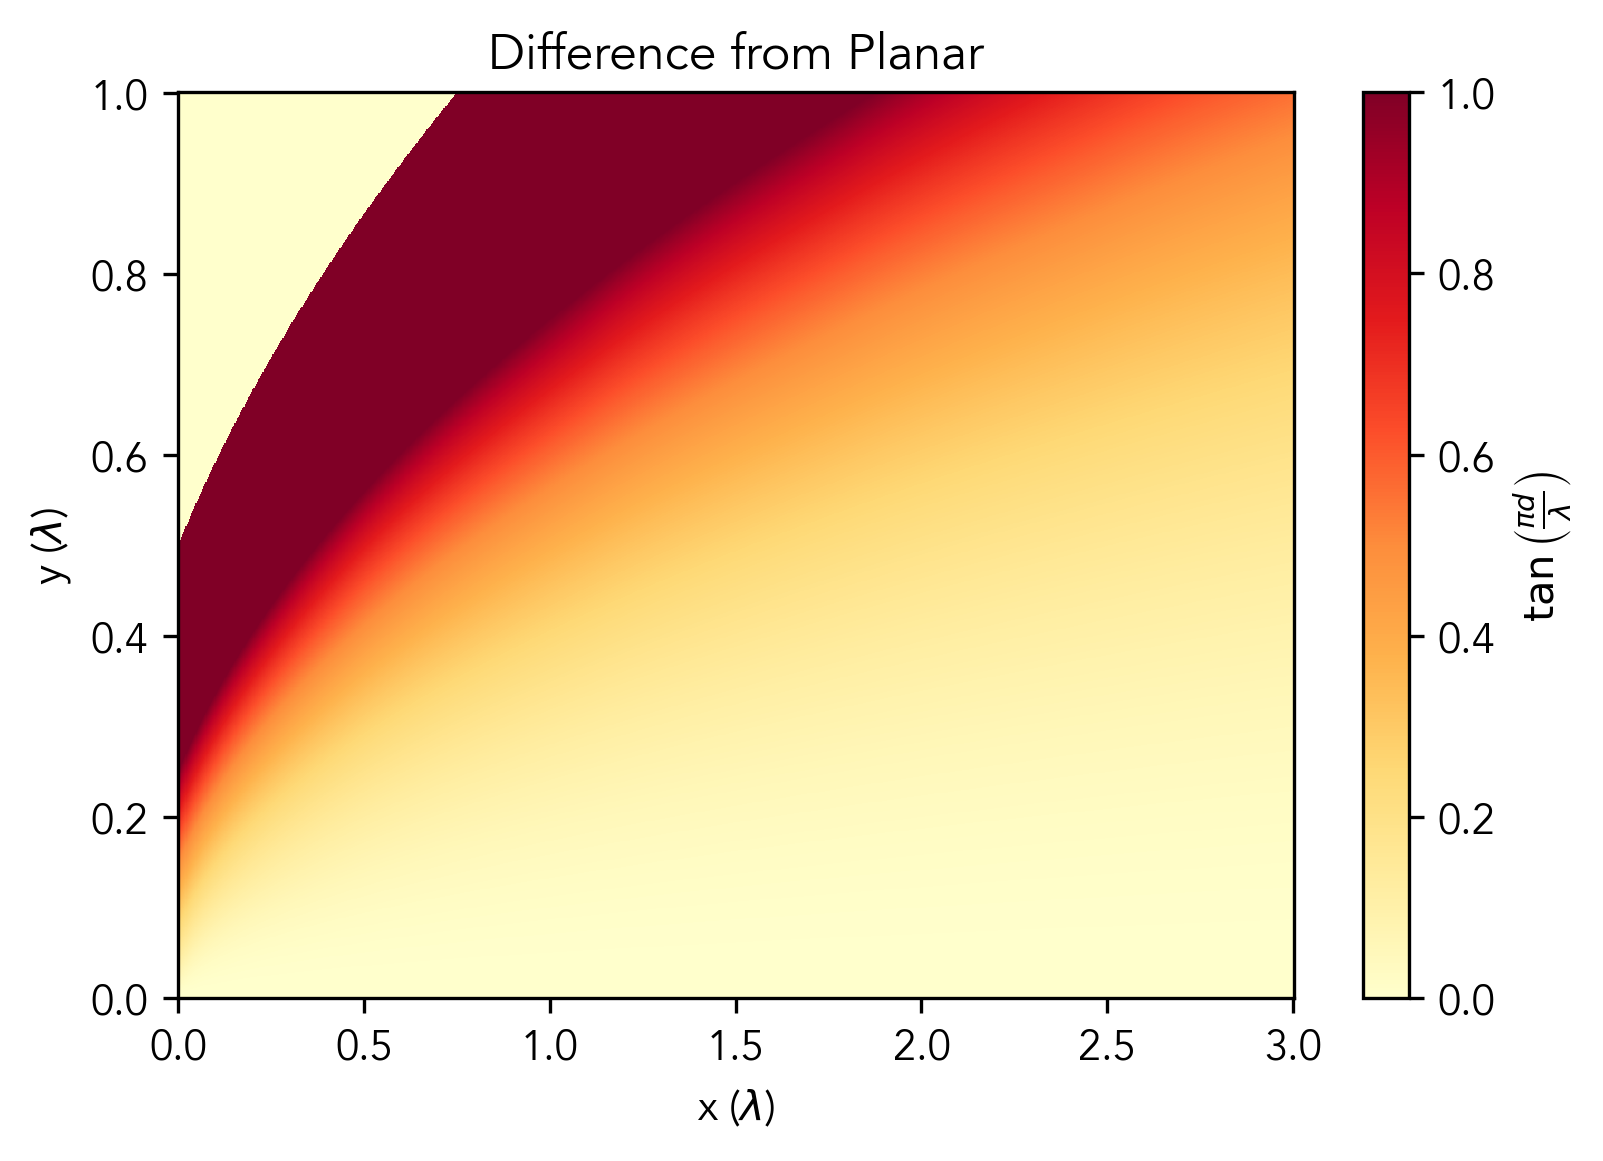

In [42]:
fig, ax = plt.subplots()
cmap=ax.pcolormesh(X, Y,np.tan(math.pi*diff),cmap='YlOrRd',vmin=0,vmax=1)
cbar=fig.colorbar(cmap)
ax.set_title("Difference from Planar")
ax.set_xlabel(r"x ($\lambda$)")
ax.set_ylabel(r"y ($\lambda$)")
cbar.set_label(r"$\tan\left(\frac{\pi d}{\lambda}\right)$")

Path difference: 0.04138126514910967  wavelengths
Amplitude Ratio: 0.9863939238321437 
Distortion 1 == tan(pi *d /lambda) :  0.13074044921441091
Distortion 2 == 1-cos(pi * d / lambda):  0.008438505380116701


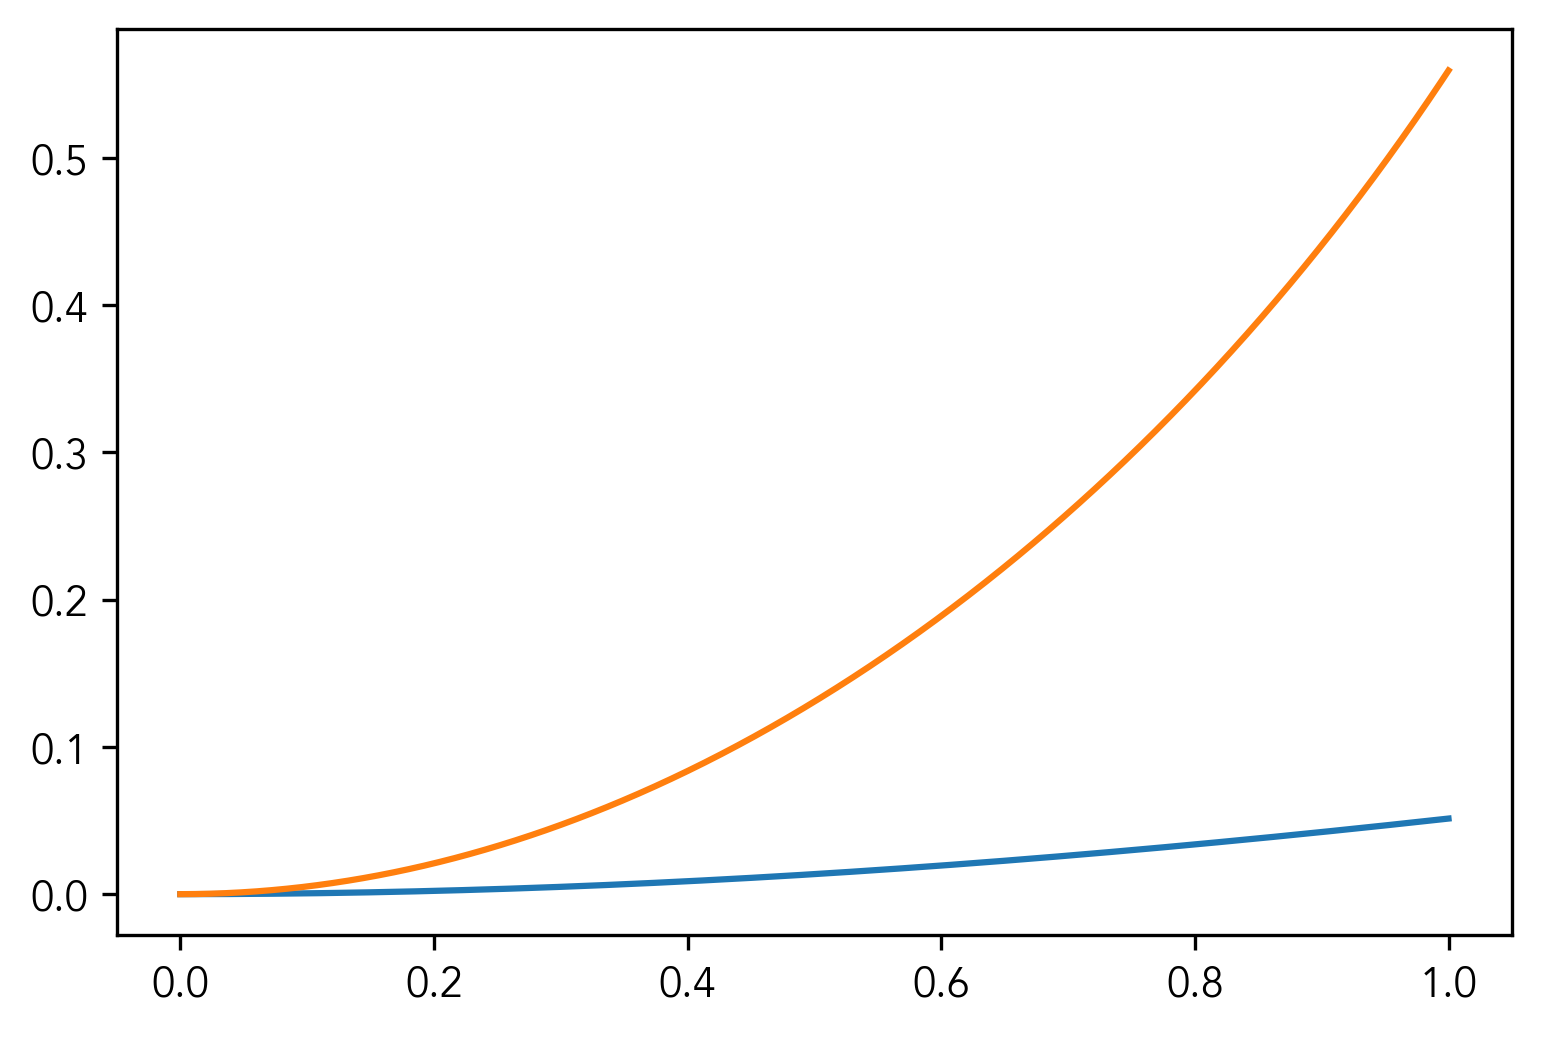

In [68]:
# Take a point at x=3 and y=0.5
x=3
y=0.5
d=np.sqrt(x**2 + y**2) - x
r=x/np.sqrt(x**2 + y**2)
print("Path difference:",d," wavelengths")
print("Amplitude Ratio:",r,"")
print("Distortion 1 == tan(pi *d /lambda) : ", np.tan(math.pi*d))
print("Distortion 2 == 1-cos(pi * d / lambda): ", 1-np.cos(math.pi*d))

fig, ax = plt.subplots()
ax.plot(yIn,1-x/np.sqrt(x**2 + yIn**2),label="1- 1/r Ratio")
ax.plot(yIn,np.tan(math.pi*(np.sqrt(x**2 + yIn**2)-x)),label="$\tan\frac{\pi d}{\lambda}$")



## Enough brainpower -- brute force solution
Okay let's imagine we have a half-wave dipole, taht runs from $-\lambda/4$ to $\lambda/4$, from symmetry we only need to consider the top half. Let's see what happens if we add up all the waves that hit along the antenna accounting for both $1/r$ and phase difference effects. How different is the resulting average wave from the simple sine wave at the centre of the antenna?  

Text(0.5, 1.0, 'Difference to simple sine-wave (half-wave dipole)')

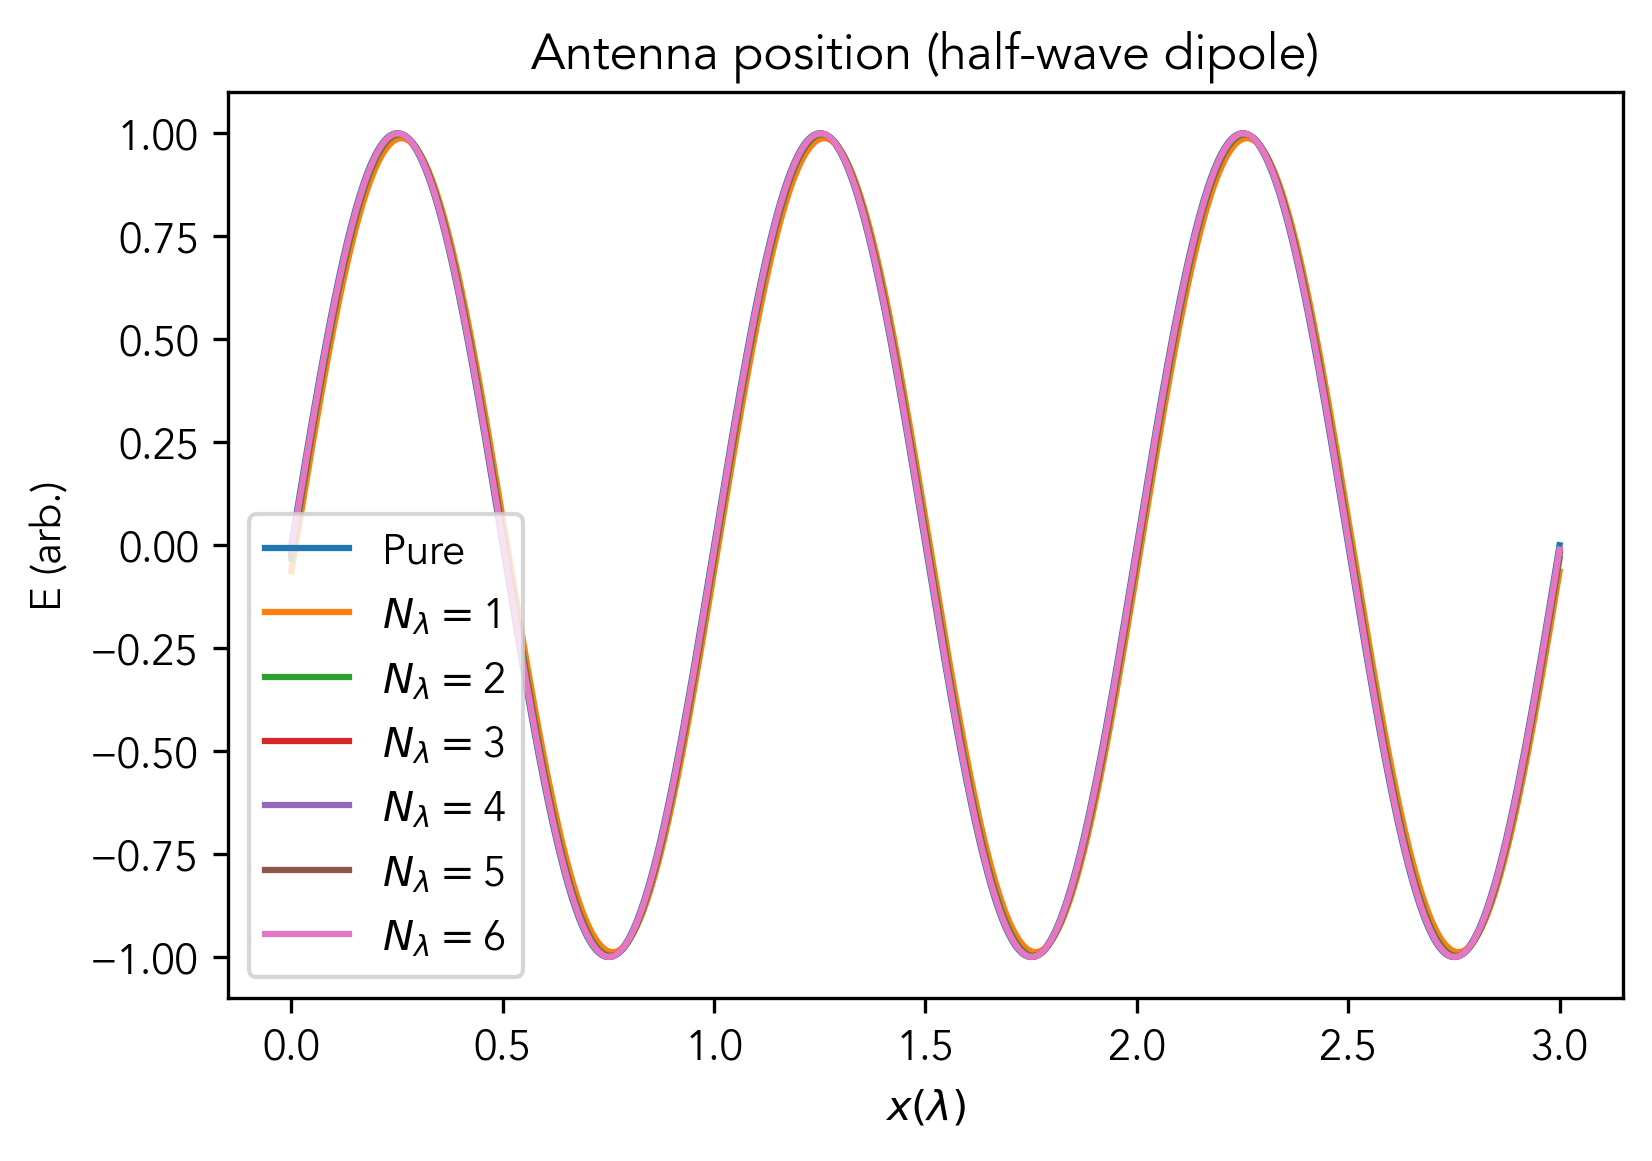

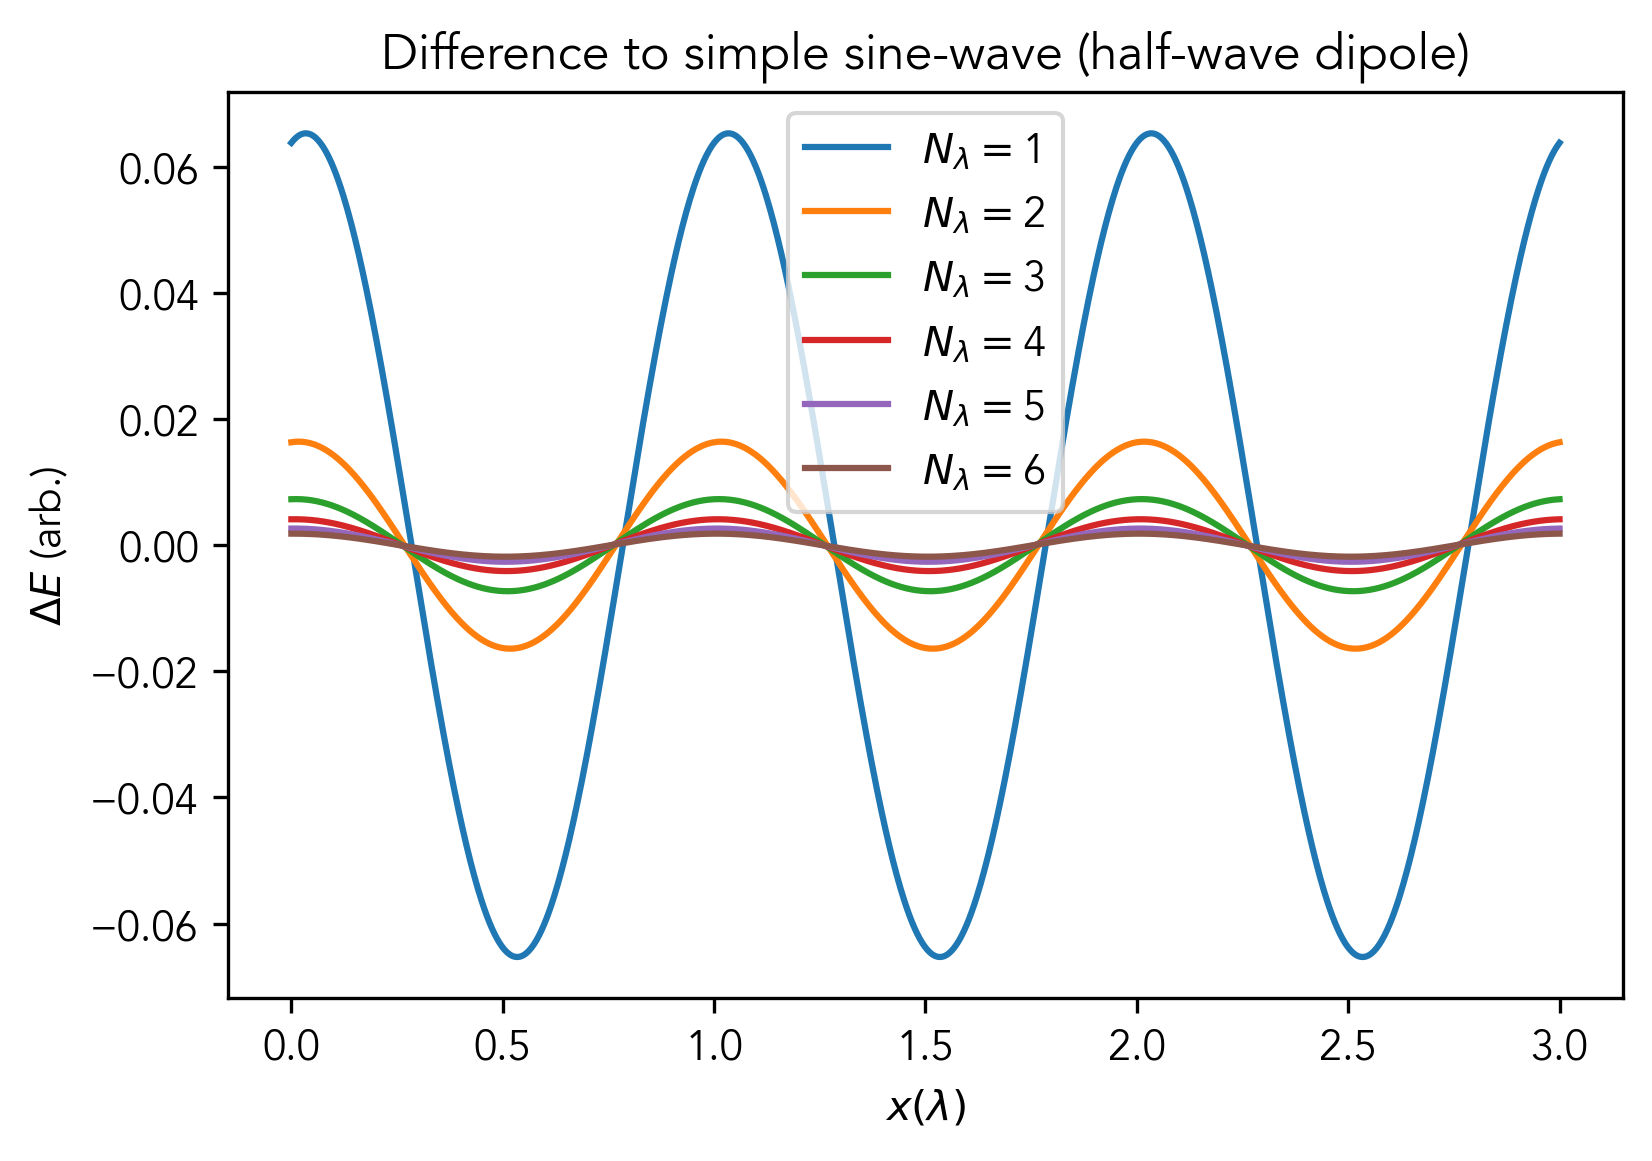

In [109]:
zIn=np.linspace(0,3,1000)  #1000 points along z
fig, ax = plt.subplots()
ax.plot(zIn,np.sin(2*math.pi*zIn),label="Pure")
yAnt=np.linspace(0,0.25,100)  #100 points from 0 to 0.25 wavelengths


fig2, ax2 = plt.subplots()
#z=1
for Z in [1,2,3,4,5,6]:
    DA=np.sqrt(Z**2 + yAnt**2)-Z
    X2,DA2 = np.meshgrid(zIn,DA)   #Create a 2D grid of x vs y for making colour plots
    valuesAmpRatio=np.sin(2*math.pi*(X2-DA2))*Z/(Z+DA2)
    values=np.sin(2*math.pi*(X2-DA2))/(Z+DA2)
    ax.plot(zIn,np.mean(valuesAmpRatio,axis=0),label="$N_\lambda=$"+str(Z))
    ax2.plot(zIn,np.sin(2*math.pi*zIn)/Z-np.mean(values,axis=0),label="$N_\lambda=$"+str(Z))
ax.legend()
ax.set_xlabel("$x (\lambda)$")
ax.set_ylabel("E (arb.)")
ax.set_title("Antenna position (half-wave dipole)")
ax2.legend()
ax2.set_xlabel("$x (\lambda)$")
ax2.set_ylabel("$\Delta E$ (arb.)")
ax2.set_title("Difference to simple sine-wave (half-wave dipole)")
